In [105]:
import numpy as np
x = sym.Symbol('x',real=True)
import sympy as sym
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
def GetRoots(f,df,x,tolerancia = 10):

    Roots = np.array([])

    for i in x:
            
            root = GetNewton(f,df,i)

            if  type(root)!=bool:
                croot = np.round( root, tolerancia )
                
                if croot not in Roots:
                    Roots = np.append(Roots, croot)
                    
    Roots.sort()

    return Roots

In [106]:

import matplotlib.pyplot as plt
def GetLaguerre(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1 - x
    else:
        poly = ((2*n-1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
   
    return sym.expand(poly,x)
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

def GetAllRootsGLag(n):

    xn = np.linspace(0,n+(n-1)*np.sqrt(n),100)
    
    Laguerre = []
    DLaguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

def GetWeightsGLag(n):

    Rootslag = GetAllRootsGLag(n) 
    Weightslag = []
    for i in range(len(Rootslag)):
        Laguerre_n1 = GetLaguerre(n + 1, Rootslag[i])
        weight = Rootslag[i]/ (((n + 1) **2 )* (Laguerre_n1 ** 2))
        Weightslag.append(weight)

    
    return Weightslag

In [108]:
def integral(F,n):
    w=GetWeightsGLag(n)
    r=GetAllRootsGLag(n)
    
    Int=0
    for i in range(0,n):
        Int+= w[i]*F(r[i])
    return Int
def funtion(x):
    Funtion=x**3/(1-np.e**(-1*x))
    return Funtion
integral(funtion,7)

7


6.49391891010112

2
3
4
5
6
7


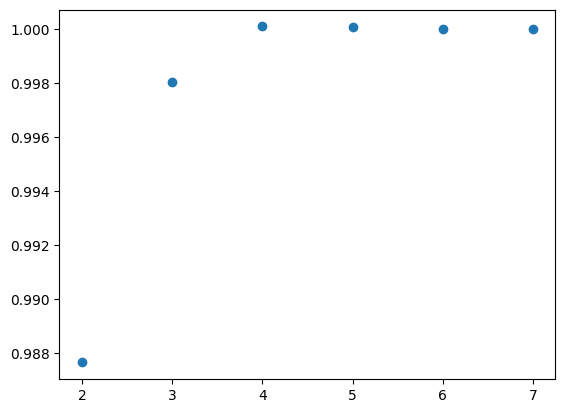

In [112]:
INTEGRALES=np.array([])
N=np.array([])
i=2
while i <=7:
    INTEGRALES= np.append(INTEGRALES,np.array(integral(funtion,i)/(np.pi**4/15)))
    N=np.append(N,i)
    i+=1           


plt.scatter(N,INTEGRALES)
plt.show()